In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
from causalimpact import CausalImpact

In [2]:
# ts = TimeSeries(key=json.load(open('api.json','r'))['key'], output_format='pandas')
# pfe_data, pfe_meta_data = ts.get_daily(symbol='PFE',outputsize='full')
# pfe_data.to_csv('pfe_daily.csv')

In [3]:
pfe_data = pd.read_csv('pfe_daily.csv')

In [4]:
doj_data = pd.read_json('doj_data_with_tags_and_industries.json')

In [5]:
doj_data[doj_data.tagged_symbols.apply(lambda li: 'pfe' in li)]

,all_orgs,clean_orgs,components,contents,date,id,industries,organizations,organizations_titles,sectors,tagged_companies,tagged_symbols,title,topics
10020,"[the Federal Food Drug and Cosmetic Act, Proto...","[the federal food drug and cosmetic act, proto...",[Civil Division],Pfizer Inc. will pay $55 million plus interest...,2012-12-12 05:00:00,12-1488,"[Major Pharmaceuticals, Major Pharmaceuticals]","[the Federal Food Drug and Cosmetic Act, Proto...","[Off-Label Use, IllegallyPromoting Protonix]","[Health Care, Health Care]","[PFIZER INC, WYETH, WYETH, PFIZER INC]","[pfe, wye, wye, pfe]",Pfizer Agrees to Pay $55 Million for Illegally...,[Consumer Protection]
10021,"[The Department of Justice, H.C.P., Pfizer H.C...","[the department of justice, h.c.p, pfizer h.c....",[Criminal Division],"WASHINGTON – Pfizer H.C.P. Corporation, an i...",2012-08-07 04:00:00,12-980,[Major Pharmaceuticals],"[The Department of Justice, H.C.P., Pfizer H.C...",[Pfizer H.C.P. Corp.],[Health Care],"[PFIZER INC, WYETH, WYETH]","[pfe, wye, wye]",Pfizer H.C.P. Corp. Agrees to Pay $15 Million ...,[]
10022,"[Pfizer, Medicare, Medicaid, the Justice Depar...","[pfizer, medicare, medicaid, the justice depar...",[Civil Division],WASHINGTON – American pharmaceutical compa...,2011-10-21 04:00:00,11-1389,"[Major Pharmaceuticals, Major Pharmaceuticals]","[Pfizer, Medicare, Medicaid, the Justice Depar...",[Illegal Marketing of Drug],"[Health Care, Health Care]","[PFIZER INC, PFIZER INC]","[pfe, pfe]",Pfizer to Pay $14.5 Million for Illegal Market...,[]
10594,"[the Colgate-Palmolive Company, Pfizer, the U....","[the colgate-palmolive, pfizer, the u.s. envir...",[Environment and Natural Resources Division],WASHINGTON—A multi-party settlement involvin...,2009-01-06 05:00:00,09-007,"[Major Pharmaceuticals, Auto Parts:O.E.M.]","[the Colgate-Palmolive Company, Pfizer, the U....",[],"[Health Care, Capital Goods]","[PFIZER INC, HONEYWELL INTERNATIONAL INC]","[pfe, hon]",Settlement Clears Way for Continued Funding \r...,[]
12250,[CAA National Emission Standards for Pharmaceu...,[caa national emission standards for pharmaceu...,[Environment and Natural Resources Division],King Pharmaceuticals LLC (King) will pay $2....,2013-06-28 04:00:00,13-737,"[Major Pharmaceuticals, Major Pharmaceuticals]",[CAA National Emission Standards for Pharmaceu...,[Resolve Allegations of Clean Air Act Violatio...,"[Health Care, Health Care]","[PFIZER INC, KING PHARMACEUTICALS INC, PFIZER ...","[pfe, kg, pfe, kg]",United States and Tennessee Reach Agreement wi...,[]
13060,"[Wyeth, Pfizer, The Department of Justice, Med...","[wyeth, pfizer, the department of justice, med...",[Civil Division],The Department of Justice announced today that...,2016-04-27 04:00:00,16-498,"[Major Pharmaceuticals, Major Pharmaceuticals]","[Wyeth, Pfizer, The Department of Justice, Med...","[Wyeth, Wyeth Underpaid Drug Rebates, Medicaid]","[Health Care, Health Care]","[WYETH, PFIZER INC, PFIZER INC, WYETH]","[wye, pfe, pfe, wye]",Wyeth and Pfizer Agree to Pay $784.6 Million t...,"[False Claims Act, Health Care Fraud]"
13061,"[al v. Wyeth Pharmaceuticals, Inc.,, FDA OCI, ...","[al v. wyeth pharmaceuticals, inc, fda oci, of...",[Civil Division],"Wyeth Pharmaceuticals Inc., a pharmaceutical c...",2013-07-30 04:00:00,13-860,"[Major Pharmaceuticals, Major Pharmaceuticals]","[al v. Wyeth Pharmaceuticals, Inc.,, FDA OCI, ...",[Wyeth Pharmaceuticals],"[Health Care, Health Care]","[PFIZER INC, WYETH, WYETH, PFIZER INC]","[pfe, wye, wye, pfe]",Wyeth Pharmaceuticals Agrees to Pay $490.9 Mil...,[Consumer Protection]
2309,"[Senate, Treasury, the Department of Veterans ...","[senate, treasury, the department of veterans ...",[Civil Division],WASHINGTON - The Department of Justice secur...,2010-11-22 05:00:00,10-1335,"[Major Pharmaceuticals, Major Pharmaceuticals]","[Senate, Treasury, the Department of Veterans ...",[Department of Justice],"[Health Care, Health Care]","[PFIZER INC, ASTRAZENECA PLC]","[pfe, azn]",Department of Justice Recov

In [6]:
event_dates = doj_data[doj_data.tagged_symbols.apply(lambda li: 'pfe' in li)].date

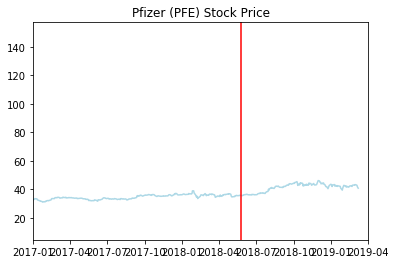

In [22]:
plt.plot(pd.to_datetime(pfe_data.date),pfe_data['4. close'],'-', c='lightblue', label='close')
for dt in event_dates:
    plt.axvline(dt,c='r')
plt.xlim(pd.datetime.strptime('2017','%Y'),pd.datetime.strptime('201904','%Y%m'))
plt.title('Pfizer (PFE) Stock Price')
plt.show()

In [39]:
data_for_pred = pfe_data[
    pd.to_datetime(pfe_data.date) > pd.datetime.strptime('2017','%Y')][
    ['date','4. close']].reset_index().drop('index',axis=1).copy()

In [40]:
data_for_pred.rename({date:''})

,date,4. close
0,2017-01-03,33.00
1,2017-01-04,33.29
2,2017-01-05,33.61
3,2017-01-06,33.48
4,2017-01-09,33.47
5,2017-01-10,33.44
6,2017-01-11,32.83
7,2017-01-12,32.60
8,2017-01-13,32.52
9,2017-01-17,32.06
